In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
tf.__version__

'2.12.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_dir = '/content/drive/MyDrive/Skripsi/dataset2'
os.listdir(data_dir)

['mengkal', 'matang', 'mentah']

In [5]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Skripsi/dataset2')

Found 579 files belonging to 3 classes.


In [6]:
print('Total anggur Matang :', len(os.listdir('/content/drive/MyDrive/Skripsi/dataset2/matang')))
print('Total anggur Mengkal :', len(os.listdir('/content/drive/MyDrive/Skripsi/dataset2/mengkal')))
print('Total anggur Mentah :', len(os.listdir('/content/drive/MyDrive/Skripsi/dataset2/mentah')))

Total anggur Matang : 193
Total anggur Mengkal : 193
Total anggur Mentah : 193


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
# Get another batch from the iterator
batch = data_iterator.next()

In [9]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [10]:
# 0 = matang || 1 = mengkal || 2 = mentah

batch[1]

array([0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 2, 1, 0, 1, 0, 1, 2, 0, 1], dtype=int32)

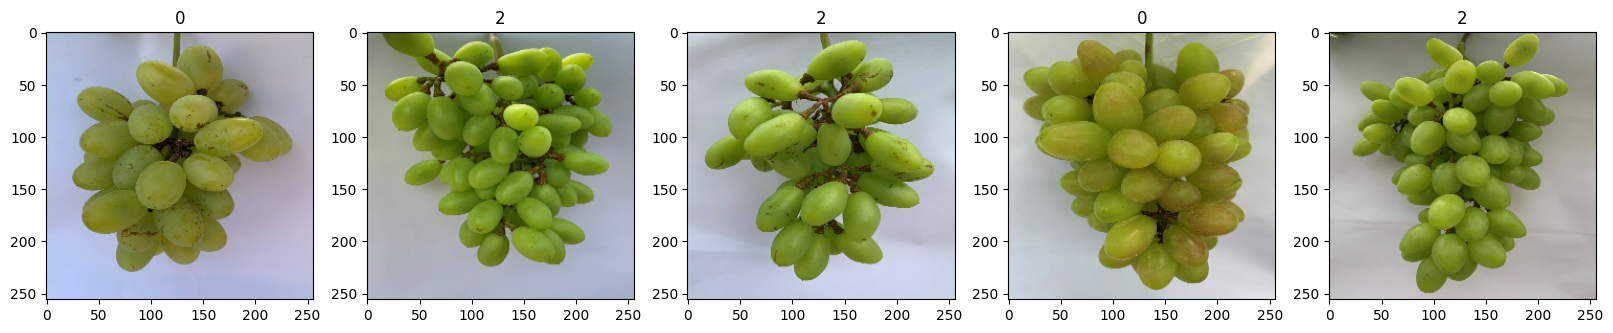

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocess Data

In [12]:
# Scale
data = data.map(lambda x, y: (x/255, y))

In [13]:
# Split
len(data)
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
len(data)

In [ ]:
test_size

In [ ]:
train_size+val_size+test_size

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build the deep neural network

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(256, 256, 3))),
    #tf.keras.layers.Dropout(0.4),
    # Flatten the results to feed into a CNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.layers[0].trainable = False

234545216/234545216 [==============================] - 7s 0us/step


In [19]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 125,573,123
Trainable params: 67,241,475
Non-trainable params: 58,331,648
_________________________________________________________________


In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, validation_data=val, epochs=20, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 76s 4s/step - loss: 294.7132 - accuracy: 0.4821 - val_loss: 18.1104 - val_accuracy: 0.6719
Epoch 2/20
14/14 [==============================] - 10s 671ms/step - loss: 11.3272 - accuracy: 0.6964 - val_loss: 5.2460 - val_accuracy: 0.8047
Epoch 3/20
14/14 [==============================] - 9s 539ms/step - loss: 2.5894 - accuracy: 0.8683 - val_loss: 1.4445 - val_accuracy: 0.9141
Epoch 4/20
14/14 [==============================] - 10s 681ms/step - loss: 0.8607 - accuracy: 0.9219 - val_loss: 0.1220 - val_accuracy: 0.9609
Epoch 5/20
14/14 [==============================] - 10s 684ms/step - loss: 0.2792 - accuracy: 0.9598 - val_loss: 0.1255 - val_accuracy: 0.9688
Epoch 6/20
14/14 [==============================] - 9s 548ms/step - loss: 0.0524 - accuracy: 0.9911 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 9s 580ms/step - loss: 0.0163 - accuracy: 0.9978 - val_loss: 0.0177 - val_accuracy: 0.9922
E

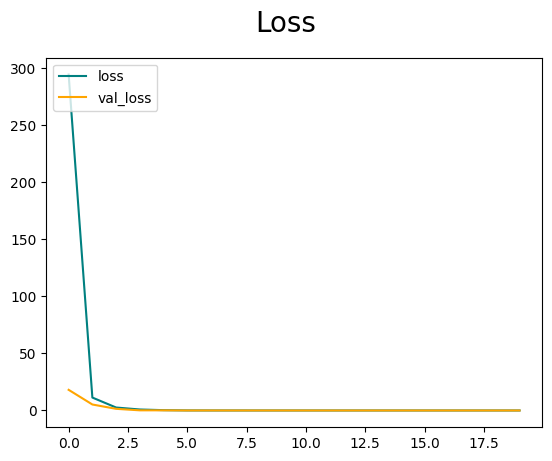

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

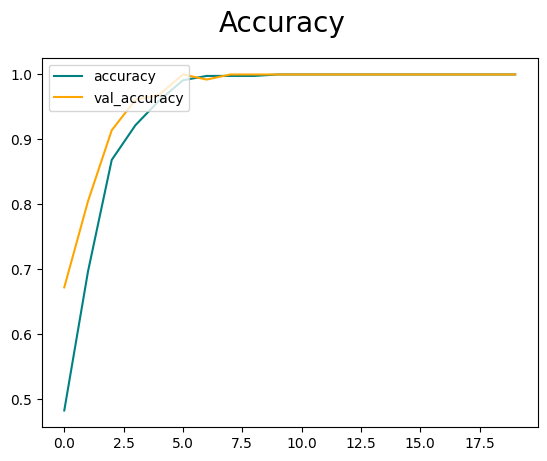

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
len(test)

1

In [27]:
model.evaluate(test)

1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

Testing data baru

In [28]:
import cv2

Class 0

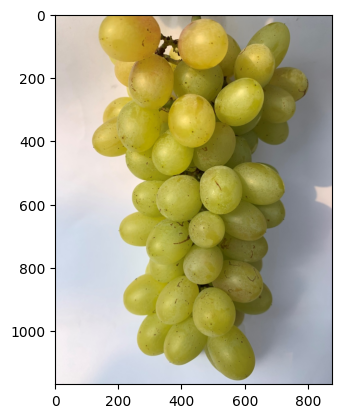

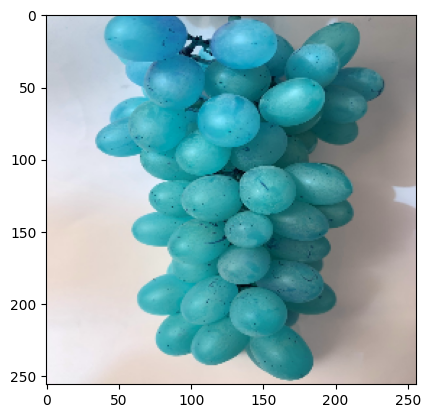

1/1 [==============================] - 3s 3s/step


array([[9.9787927e-01, 2.1198743e-03, 8.1442261e-07]], dtype=float32)

In [29]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/tes2/matang/matang20.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

Class 1

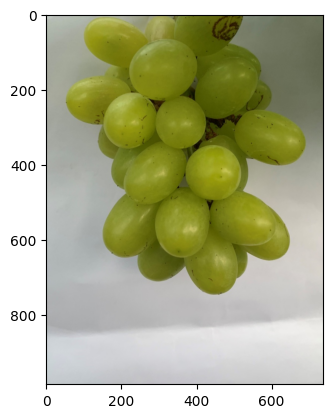

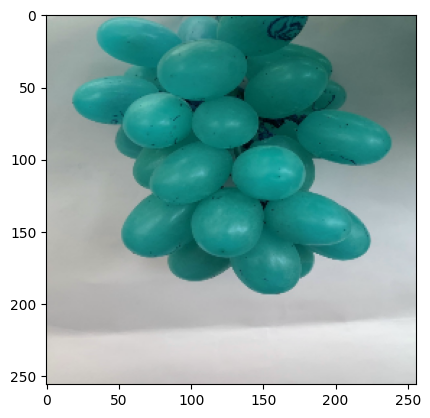

1/1 [==============================] - 0s 33ms/step


array([[1.9844407e-07, 9.9999976e-01, 1.5719146e-09]], dtype=float32)

In [30]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/tes2/mengkal/mengkal11.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

Class 2

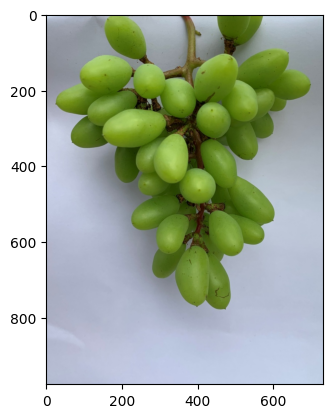

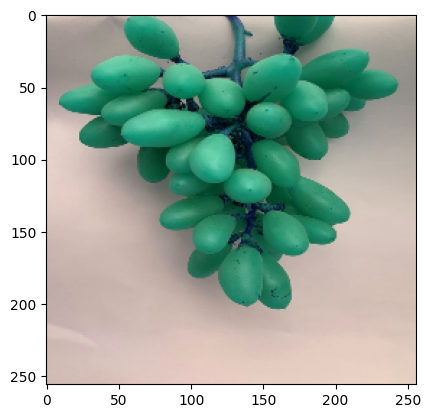

1/1 [==============================] - 0s 56ms/step


array([[7.1805014e-33, 3.2411682e-30, 1.0000000e+00]], dtype=float32)

In [31]:
img = cv2.imread('/content/drive/MyDrive/Skripsi/tes2/mentah/mentah15.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

In [ ]:
save_path = '/content/drive/MyDrive/Skripsi/model/'
tf.saved_model.save(model, save_path)

In [ ]:
!saved_model_cli show --dir /content/drive/MyDrive/Skripsi/model --tag_set serve --signature_default

2023-06-18 05:15:33.239318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
FATAL Flags parsing error: Unknown command line flag 'signature_default'. Did you mean: signature_def, signature_def_key ?
Pass --helpshort or --helpfull to see help on flags.


In [32]:
model.save("model.h5")